In [2]:
#Check the enviroment that Jupyter is using:
#import sys
#sys.executable

import numpy as np
#Machine learning library:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#NOTE on scikit-learn: Is used for typical Machine Learning Algorihms and not Deep-learning.

#Image processing library:
from skimage import io, color
'''
#Tensorflow libraries: 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
'''
#Plotting library:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#CSV handler: https://docs.python.org/3/library/csv.html 
import csv
#Web handler: https://pypi.org/project/requests/
import requests 
# https://pandas.pydata.org/ 
import pandas as pd 
#Pillow library for images: https://pypi.org/project/Pillow/
from PIL import Image
#BytesIO: https://docs.python.org/3/library/io.html
from io import BytesIO
import io
#For concurrency and asynchronous operation
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor
import threading
import multiprocessing
from multiprocessing import Pool, cpu_count, Lock, Manager, process
#Counter for counting elements and unique elements
from collections import Counter
#OS file manipulation
import os 
import platform
#Math operations
import math
#Run another async loop inside Jupyter
import shutil

In [2]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print('GPU is available.')
else:
    print('No GPU available.')

No GPU available.


2023-10-21 12:27:49.565011: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-21 12:27:49.592798: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Total number of image dimensions: 346721


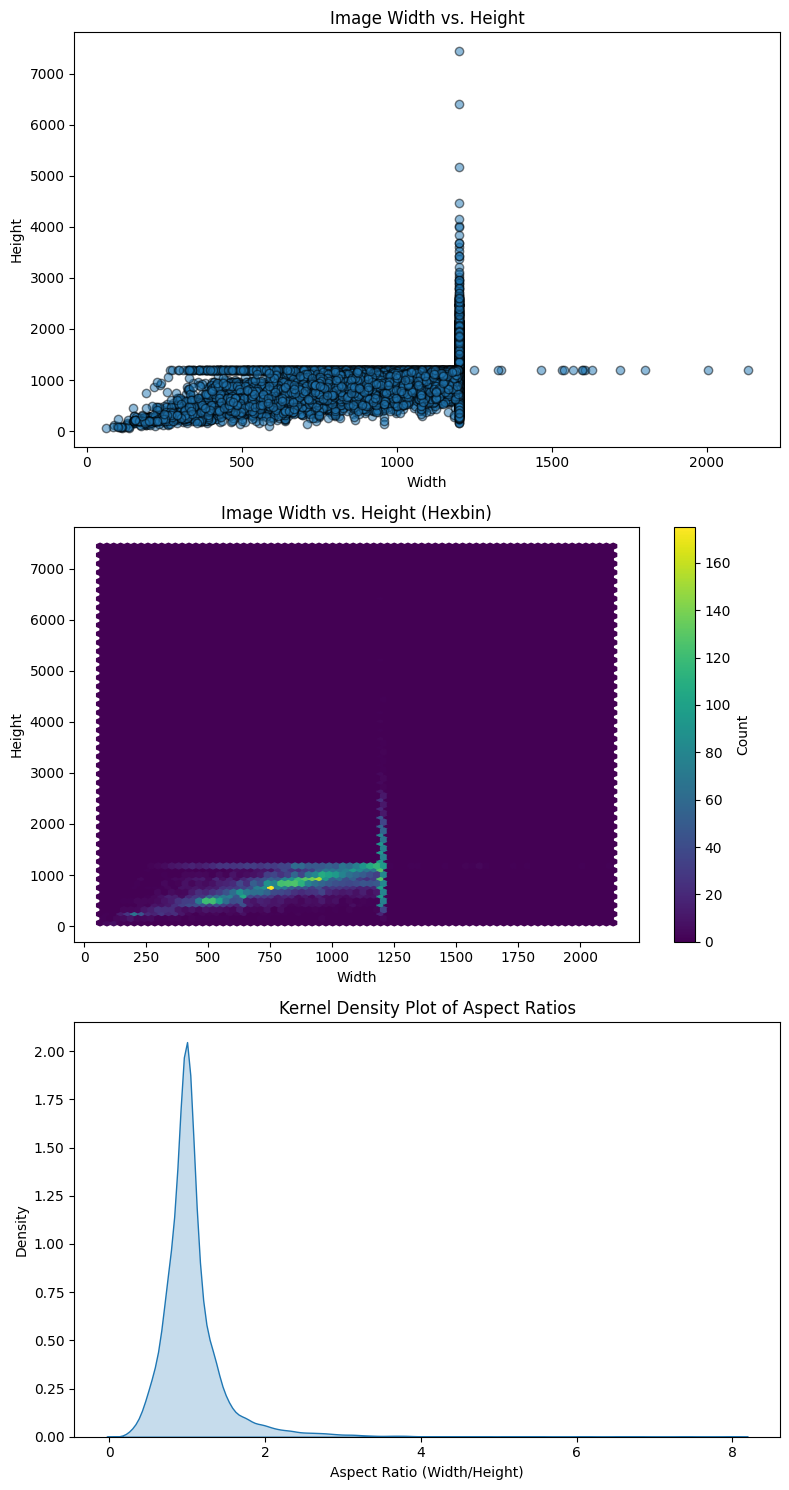

In [53]:
# Read and plot the image sizes of the original full dataset

# Replace with your file path
file_path = '/home/magnusjsc/Skrivebord/Classification-and-3D-reconstruction-of-archaeological-artifacts/python_scripts/processed_images_dimensions.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Sum of total images
total_occurrences = df['Occurrences'].sum()
print(f'Total number of image dimensions: {total_occurrences}')

# Log scale the 'Occurrences' column - More precision for large amount of data points
df['Log_Occurrences'] = np.log(df['Occurrences'])

# Calculate the 'Dimensions' column by combining 'Width' and 'Height
df['Dimensions'] = df['Width'].astype(str) + 'x' + df['Height'].astype(str)

# Calculate the 'Aspect Ratio' column
df['Aspect Ratio'] = df['Width'] / df['Height']

# Plot the figures ontop of eachother. 3 rows with 1 plot in each
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))

# Plot image width vs. height
ax1.scatter(df['Width'], df['Height'],edgecolor='k' ,alpha=0.5)
ax1.set_title('Image Width vs. Height')
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')

# Create a hexbin plot for image width vs. height
hb = ax2.hexbin(df['Width'], df['Height'], gridsize=75, cmap='viridis')
ax2.set_title('Image Width vs. Height (Hexbin)')
ax2.set_xlabel('Width')
ax2.set_ylabel('Height')
# Add a colorbar to the hexbin plot
cb = plt.colorbar(hb)
cb.set_label('Count')
# Set the x-axis locator and formatter for the hexbin plot
ax2.xaxis.set_major_locator(plt.MaxNLocator(nbins=10))
ax2.xaxis.set_major_formatter(plt.ScalarFormatter())

# Create a KDE plot for aspect ratios
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html 
sns.kdeplot(df['Aspect Ratio'], ax=ax3, fill=True)
ax3.set_title('Kernel Density Plot of Aspect Ratios')
ax3.set_xlabel('Aspect Ratio (Width/Height)')

# Display the plots side by side
plt.tight_layout()
plt.show()

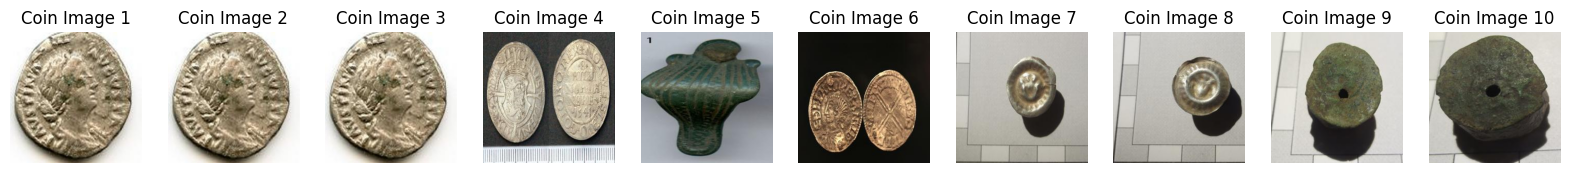

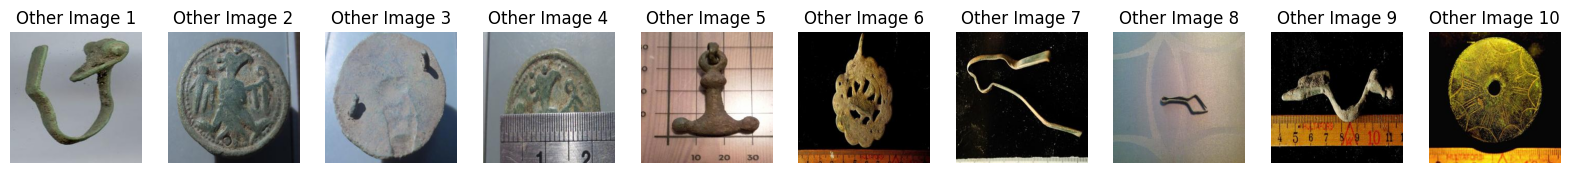

In [12]:
# Display the 10 coin images and 10 others images - how they look like

coin_path = '/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_coin_256x256/'
others_path = '/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_others_256x256/'

num_coin_images_to_display = 10
num_others_image_to_display = 10

#Create subplot
fig, axes = plt.subplots(1, num_coin_images_to_display, figsize=(20, 5))  # Adjust the figure(s) size as needed
fig2, axes2 = plt.subplots(1, num_others_image_to_display, figsize=(20, 5))

coin_files = os.listdir(coin_path)

# Load and display the first 10 coin images
for i in range(num_coin_images_to_display):
    image_path = os.path.join(coin_path, coin_files[i])  
    image = mpimg.imread(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f'Coin Image {i + 1}')
    axes[i].axis('off')

others_files = os.listdir(others_path)

# Load and display the first 10 images from the "others" category
for i in range(num_others_image_to_display):
    image_path = os.path.join(others_path, others_files[i]) 
    image = mpimg.imread(image_path)
    axes2[i].imshow(image)
    axes2[i].set_title(f'Other Image {i + 1}')
    axes2[i].axis('off')

2023-10-19 12:24:33.233120: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1251213312 exceeds 10% of free system memory.
2023-10-19 12:24:33.416472: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1251213312 exceeds 10% of free system memory.


Epoch 1/10
50/50 [==============================] - 39s 768ms/step - loss: 1.4369 - accuracy: 0.5336 - val_loss: 0.6653 - val_accuracy: 0.6432
Epoch 2/10
50/50 [==============================] - 38s 765ms/step - loss: 0.5971 - accuracy: 0.7021 - val_loss: 0.6346 - val_accuracy: 0.6784
Epoch 3/10
50/50 [==============================] - 38s 766ms/step - loss: 0.4546 - accuracy: 0.8058 - val_loss: 0.6481 - val_accuracy: 0.6985
Epoch 4/10
50/50 [==============================] - 38s 766ms/step - loss: 0.2984 - accuracy: 0.8894 - val_loss: 0.7807 - val_accuracy: 0.6633
Epoch 5/10
50/50 [==============================] - 38s 768ms/step - loss: 0.1969 - accuracy: 0.9397 - val_loss: 0.8694 - val_accuracy: 0.6608
Epoch 6/10
50/50 [==============================] - 38s 766ms/step - loss: 0.1384 - accuracy: 0.9711 - val_loss: 1.0131 - val_accuracy: 0.6759
Epoch 7/10
50/50 [==============================] - 38s 767ms/step - loss: 0.0837 - accuracy: 0.9799 - val_loss: 0.9771 - val_accuracy: 0.6960

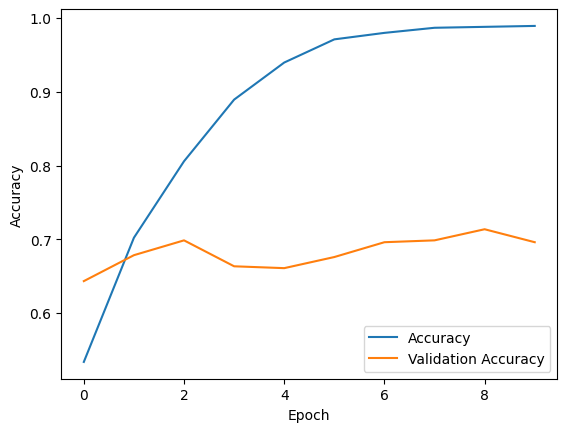

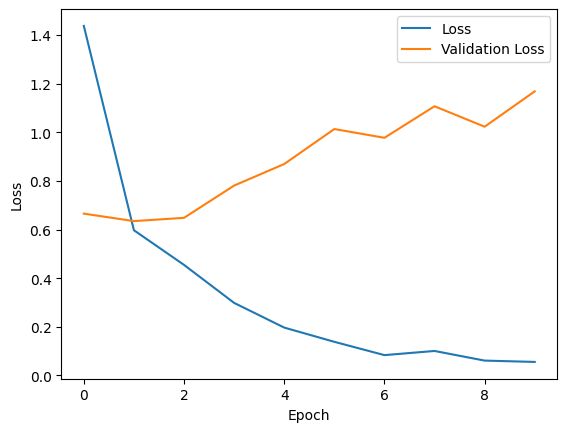

In [2]:
# Data augmentation - Prevent overfitting. Dropout - Regularization. Validation set - validate model performance.
# Reduce model complexity if needed. Other methods can be considered if needed.
# Note: If the data in the dataset has alot of simular images, the model can end up not recognizing unseen data points
# TODO: 
# Verified and non-verified data points - Split data.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

# Replace with the path to your dataset
path_to_coins = '/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_coin_256x256/'
path_to_others = '/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_others_256x256/'

num_images_to_use = 1000

# Define image dimensions and batch size
image_width = 256
image_height = 256
batch_size = 32

# Load and preprocess the dataset
def load_and_preprocess_dataset(directory, label):
    image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)[:num_images_to_use]]
    images = [tf.image.decode_image(tf.io.read_file(path)) for path in image_paths]
    # -1 accesses the last element which is the color channel. 
    images = [image for image in images if image.shape[-1] == 3]
    labels = [label] * len(images)
    return images, labels

coins_images, coins_labels = load_and_preprocess_dataset(path_to_coins, 1)
not_coins_images, not_coins_labels = load_and_preprocess_dataset(path_to_others, 0)

# Split the data into training and validation sets
X = coins_images + not_coins_images
y = coins_labels + not_coins_labels
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays and normalize -> Instead of 0-255 we get 0-1
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32) / 255.0
X_val = tf.convert_to_tensor(X_val, dtype=tf.float32) / 255.0
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_val = tf.convert_to_tensor(y_val, dtype=tf.float32)

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print("Test accuracy:", test_accuracy)

# History
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Size of coin dataset: 10000
Size of others dataset: 10000
Size of full dataset: 20000
Size of filtered dataset (Only RGB): 19989


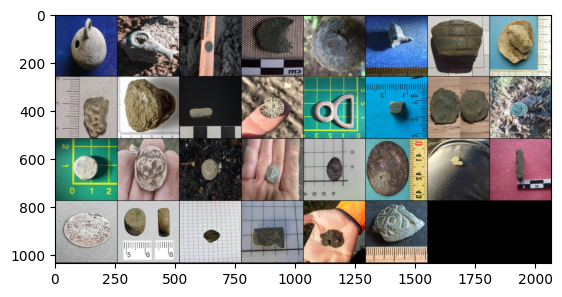

Labels in order: tensor([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0])


In [1]:
# Data prep - Using Pytorch and PIL

import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.io import read_image
import torch
import torchvision
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import numpy as np

# Docs:
# https://pytorch.org/tutorials/beginner/basics/data_tutorial.html?highlight=dataloader

# 256x256 images
path_to_coins = "/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_coin_256x256/"
path_to_others = "/run/media/magnusjsc/T7/Classification-and-3D-reconstruction-of-archaeological-artifacts_DATA/resized_images_others_256x256/"

class Dataset(Dataset):
    def __init__(self, directory, label, transform=None):
        self.directory = directory
        self.label = label
        self.transform = transform
        self.image_paths = [os.path.join(directory, filename) for filename in os.listdir(directory)]

    # len and getitem is handled by PyTorch
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        image = read_image(image_path)
        if self.transform:
            image = self.transform(image)
        return image, self.label

# Labels - Binary
coin_label = 1
other_label = 0

# Transform the data handler - Pytorch
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    # transforms.ToTensor(),
])

num_images_to_load = 10000
# Load data and add label + transform the data
coin_dataset = Dataset(path_to_coins, coin_label, transform=data_transforms)
other_dataset = Dataset(path_to_others, other_label, transform=data_transforms)
# Slice the list of image paths to load only a specific number of images
coin_dataset.image_paths = coin_dataset.image_paths[:num_images_to_load]
other_dataset.image_paths = other_dataset.image_paths[:num_images_to_load]
full_dataset = coin_dataset + other_dataset
# Filter out non-RGB images - Tensors
filtered_dataset = [(img, label) for img, label in full_dataset if img.shape[0] == 3]

# Test
print(f'Size of coin dataset: {len(coin_dataset)}')
print(f'Size of others dataset: {len(other_dataset)}')
print(f'Size of full dataset: {len(full_dataset)}')
print(f'Size of filtered dataset (Only RGB): {len(filtered_dataset)}')

# Split the data for training, validation, and testing
training = 0.7
validation = 0.15
testing = 0.15

total_size = len(filtered_dataset)
train_size = int(training * total_size)
val_size = int(validation * total_size)
test_size = total_size - train_size - val_size

# Randomly split the full dataset into training, validation and testing sets
train_set, val_set, test_set = random_split(filtered_dataset, [train_size, val_size, test_size])

# Hyperparameter - Batch size 
BATCH_SIZE = 30
# Create data loaders for each set
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True) # Shuffle the training set
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

# Print some of the images 
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images)) 
print(f'Labels in order: {labels}')

In [35]:
# Pytorch CNN: 
import torch
import torchvision
import torch.nn as nn 
import torch.nn.functional as F # Functions like ReLu

# Docs: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

numOfChannels = 3
numOfclasses = 2

class CoinClassifier(nn.Module):
    def __init__(self):
        super(CoinClassifier, self).__init__()

        # First layer init: 3 input channel image, 6 output channels, 3x3 square conv. kernel
        self.conv1 = nn.Conv2d(in_channels=numOfChannels, out_channels=6, kernel_size=(5,5), stride=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2,2), stride=2)
        # NOTE: 3 inputs for RGB. Out ????

        # Second layer init
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=(5,5), stride=2, padding=1) 
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2,2), stride=2)

        # Init FC -> ReLu
        self.fc1 = nn.Linear(in_features=800, out_features=500)
        # Init FC 
        self.fc2 = nn.Linear(in_features=500, out_features=numOfclasses) # Output layer with two neurons for binary classification
        
    # Define how the network is connected using this forward function
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)  # Apply ReLU activation
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = F.relu(x)  # Apply ReLU activation
        x = self.maxpool2(x)

        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        x = F.relu(x)  # Apply ReLU activation

        x = self.fc2(x)
        return x

model = CoinClassifier()
print(model)

CoinClassifier(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=2, bias=True)
)


In [36]:
# Loss function optimizer, evaluation algorithm and train the model
from torch.optim import Adam
import torch.optim as optim

'''
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
'''

# Hyperparameter - Number of epochs
num_epochs = 2

# Binary Cross Entropy Loss
loss_fn = nn.BCEWithLogitsLoss()
# Adam - Gradient Descent
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

# Training loop
for epoch in range(num_epochs):
    # Set model to train mode
    model.train()
    
    totalTrainLoss = 0
    totalValLoss = 0
    trainCorrect = 0
    valCorrect = 0

    # Iterate over the training data
    for (x, y) in train_loader:
        x = x.float()
        pred = model(x)
        loss = loss_fn(pred, y)

        # Zero out the gradient and perform backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Add the loss to the total training loss and calculate the number of correct predictions
        totalTrainLoss += loss.item()
        trainCorrect += (pred.argmax(1) == y).sum().item()

    # Switch off autograd for evaluation
    with torch.no_grad():
        # Set the model in evaluation mode
        model.eval()
        # Iterate over the validation data
        for (x, y) in val_loader:
            x = x.float()
            # Make predictions and calculate the validation loss
            pred = model(x)
            totalValLoss += loss_fn(pred, y).item()
            # Calculate the number of correct predictions
            valCorrect += (pred.argmax(1) == y).sum().item()

#TODO: Continue HERE!
#https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/

RuntimeError: mat1 and mat2 shapes cannot be multiplied (30x1600 and 800x500)